In [28]:
import seaborn as sns
import pandas as pd
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data.csv")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


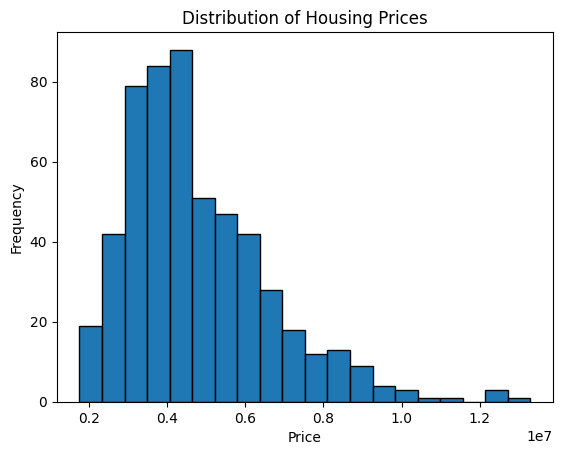

In [13]:
plt.hist(df['price'],bins=20,edgecolor='black')
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel('Frequency')
plt.show()

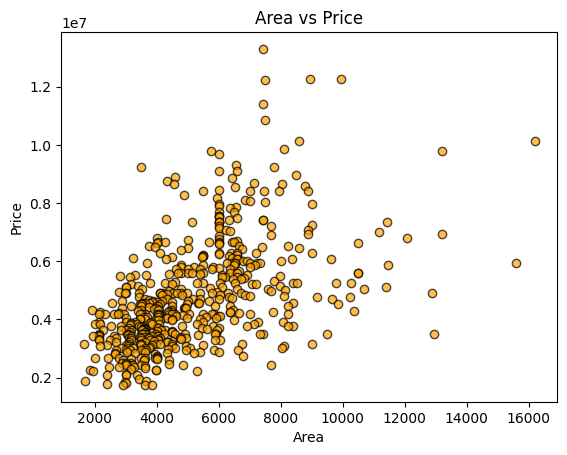

In [15]:
plt.scatter(df['area'], df['price'], alpha=0.7, color='orange', edgecolor='black')
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()


In [17]:
X=df.drop('price',axis=1)
y=df['price']
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [19]:
X = pd.get_dummies(X,drop_first=True)
X = X.astype(int)

X=X.to_numpy()
y=y.to_numpy()
X

array([[7420,    4,    2, ...,    1,    0,    0],
       [8960,    4,    4, ...,    0,    0,    0],
       [9960,    3,    2, ...,    1,    1,    0],
       ...,
       [3620,    2,    1, ...,    0,    0,    1],
       [2910,    3,    1, ...,    0,    0,    0],
       [3850,    3,    1, ...,    0,    0,    1]])

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(f"shape of X_train{X_train.shape}, shape of y train{y_train.shape}")
print(f"shape of X_test{X_test.shape}, shape of y_test{y_test.shape}")

shape of X_train(436, 13), shape of y train(436,)
shape of X_test(109, 13), shape of y_test(109,)


In [25]:
def compute_cost(x,y,w,b):
    ## computing the cost ,beware we are looping through all the observation , not features.
    m=x.shape[0]## 436 not 13
    
    cost = 0.0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)
        
    return cost

n=X_train.shape[1]
init_w=np.zeros(n)## we will get the number of features and create initilal_w.
init_b=0
total_cost=compute_cost(X_train,y_train,init_w,init_b)
print(total_cost)

13445605186863.531


In [26]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    ## computing the gradient ,beware we are looping through all the observation , not features.

    temp_dj_dw=0
    temp_dj_db=0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        dj_db_i=f_wb_i-y[i]
        dj_dw_i=(f_wb_i-y[i])*x[i]
        temp_dj_db+=dj_db_i
        temp_dj_dw+=dj_dw_i
        
    dj_db=temp_dj_db/m
    dj_dw=temp_dj_dw/m
    
    return dj_db,dj_dw

gradient=compute_gradient(X_train,y_train,init_w,init_b)
print(gradient)
X_train.shape[1]

(np.float64(-4811456.422018348), array([-2.66627702e+10, -1.47890654e+07, -6.76932913e+06, -9.49338073e+06,
       -3.89461697e+06, -4.33865218e+06, -1.03391284e+06, -1.85418922e+06,
       -2.98896789e+05, -1.96744954e+06, -1.41908222e+06, -2.14344495e+06,
       -1.20935436e+06]))


13

In [31]:
import copy

In [34]:
def gradient_descent(x,y,w_in,b_in,compute_cost,compute_gradient,alpha,iterations):
    # computing gradient descent
    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(iterations):
        dj_db,dj_dw=compute_gradient(x,y,w,b)
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)
        
        if i<100000:# Without this check, if there are many iterations (e.g., millions), appending to J_history could:
#Exhaust memory (resource exhaustion).
            cost=compute_cost(x,y,w,b)
            J_history.append(cost)
        if i%math.ceil(iterations/10)==0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w,b,J_history


In [35]:
iterations=10000
alpha = 0.01
w_final,b_final,J_hist=gradient_descent(X_train,y_train,init_w,init_b,compute_cost,compute_gradient,alpha,iterations)

Iteration    0: Cost 1067370411622933364473856.00


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_7888\773889684.py:8: RuntimeWarning: overflow encountered in scalar power
  cost=cost+(f_wb_i-y[i])**2
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_7888\2142921784.py:12: RuntimeWarning: overflow encountered in add
  temp_dj_dw+=dj_dw_i
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_7888\2142921784.py:10: RuntimeWarning: invalid value encountered in multiply
  dj_dw_i=(f_wb_i-y[i])*x[i]
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_7888\2859620308.py:8: RuntimeWarning: invalid value encountered in subtract
  w=w-(alpha*dj_dw)


Iteration 1000: Cost      nan
Iteration 2000: Cost      nan
Iteration 3000: Cost      nan
Iteration 4000: Cost      nan
Iteration 5000: Cost      nan
Iteration 6000: Cost      nan
Iteration 7000: Cost      nan
Iteration 8000: Cost      nan
Iteration 9000: Cost      nan


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score=model.score(X_test,y_test)
print(score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6212821421631904
0.6212821421631904
